<a href="https://colab.research.google.com/github/prodramp/publiccode/blob/master/machine_learning/comet_ml/UCI_Heart_Disease_Keras_Cometml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data Source Link:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

CSV Formatted Dataset:
https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

The dataset has 14 key attributes out of original 76, from the dataset along with their descriptions:

- age: The person’s age in years
- sex: The person’s sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical - angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person’s resting blood pressure
- chol: The person’s cholesterol measurement in mg/dl
- fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
- thalach: The person’s maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0–3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

Note: Make sure you have download the dataset from Kaggle link first. 

- Now we will upload the heart.csv from local file system to Google colab 
server.
- You can also use pandas to upload the file from local file system also
  - df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))


In [2]:
!pip install comet_ml

     |████████████████████████████████| 325 kB 5.4 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
     |████████████████████████████████| 548 kB 31.0 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=9e3d909d4504a6568a17370696b38f032e89b24f681da9f51d89378813e643de
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [9]:
from comet_ml import Experiment

In [47]:
experiment = Experiment(
    api_key="YOUR_COMET_ML_API_KEY_HERE",
    project_name="keras_heart_disease", 
    workspace="avkash-prodramp-com",
    auto_metric_logging=True,
    auto_param_logging=True,
    log_graph=True,
    auto_metric_step_rate=True,
    parse_args=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    auto_histogram_epoch_rate=True,
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/avkash-prodramp-com/keras-heart-disease/67fb20612b3445a7bd5a42354b45c2b8



In [12]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [13]:
!ls -l

total 16
-rw-r--r-- 1 root root 11328 Mar  1 23:59 heart.csv
drwxr-xr-x 1 root root  4096 Feb 18 14:33 sample_data


In [14]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

In [15]:
import io
df = pd.read_csv('heart.csv')

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
df.shape

(303, 14)

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

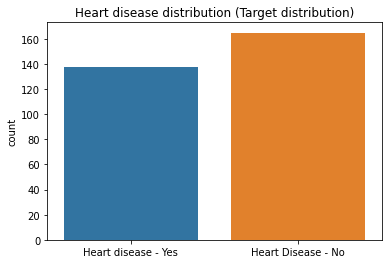

In [19]:
f = sns.countplot(x='target', data=df)
f.set_title("Heart disease distribution (Target distribution)")
f.set_xticklabels(['Heart disease - Yes', 'Heart Disease - No'])
plt.xlabel("");

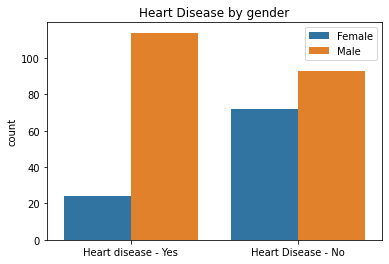

In [20]:
f = sns.countplot(x='target', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart Disease by gender")
f.set_xticklabels(['Heart disease - Yes', 'Heart Disease - No'])
plt.xlabel("");

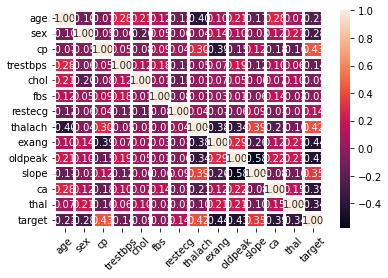

In [21]:
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (50,50)

Now we need to split the dataset into target and training format.
- Target will have only target column
- Training data will have all the columns besides target column

In [22]:
df_input = pd.DataFrame(df.iloc[:, 0:13])

In [23]:
df_input.shape

(303, 13)

In [24]:
df_input

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
df_target = pd.DataFrame(df.iloc[:, 13],columns=['target'])

In [26]:
df_target.shape

(303, 1)

In [27]:
df_target

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


Transforming the training data so it can be understood by the deep learning engine. 

- StandardScaler removes the mean and scales the data to unit variance.

More info: 
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_input = scaler.fit_transform(df_input)

In [29]:
df_scaled_input

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])


- Splitting the dataset into two sets: 
  - training set
  - testing set. 
- Library Used:
   - scikit-learn library has been used with function sklearn.model_selection.train_test_split() function to split the source data

In [30]:
from sklearn.model_selection import train_test_split
df_input_train, df_input_test, df_target_train, df_target_test = train_test_split(df_scaled_input, df_target, test_size = 0.30, random_state = 5)
print("Training data Split (Train & Test)")
print(df_input_train.shape)
print(df_input_test.shape)

print("Target data Split (Train & Test)")
print(df_target_train.shape)
print(df_target_test.shape)

Training data Split (Train & Test)
(212, 13)
(91, 13)
Target data Split (Train & Test)
(212, 1)
(91, 1)


In [31]:
## Adding Validation data with Training
X_train, X_val, y_train, y_val = train_test_split(df_input_train, df_target_train, test_size=0.2, random_state=1)
print("Training data Split with  (Train & Test)")
print(X_train.shape)
print(y_train.shape)

print("Validation data Split (Train & Test)")
print(X_val.shape)
print(y_val.shape)

Training data Split with  (Train & Test)
(169, 13)
(169, 1)
Validation data Split (Train & Test)
(43, 13)
(43, 1)


**Build the Keras classifier to predict the heart disease**

In [48]:
from keras.models import Sequential
from keras.layers import Dense

**Keras Settings:**

- In the first line, we se the model as Sequential. 
- All Layers
  - Added 3 fully connected Dense layers, two hidden and one output. 
  - All layers are from Dense class.
- First Layer (Dense(30, input_dim=13, activation='tanh'))
  - The first input layer has inout dimension as 13 for all 13 columns.
  - the activation function is tanh
- Second Layer (Dense(20, activation='tanh'))
  - It has 20 neurons and the tanh activation function. 
- Output Layer (Dense(1, activation='sigmoid'))
  - Output layer has a single neuron (output) 
  - The sigmoid activation function is selected for binary classification problems 
  - Out target data is binay - Yes or No heart disease .


In [49]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

**Compile and fit Step:**

Compile function has 3 arguments:
- The adam optimizer: An algorithm for first-order gradient-based optimization.
- The binary_crossentropy loss function: logarithmic loss, which for a binary classification problem is defined in Keras as binary_crossentropy
- The accuracy metric: to evaluate the performance of your model during training and testing

Fit Function has the following parameters:
- epochs = 100

**Plotting Keras Model**
- https://keras.io/api/utils/model_plotting_utils/


In [34]:
from keras.utils.vis_utils import plot_model

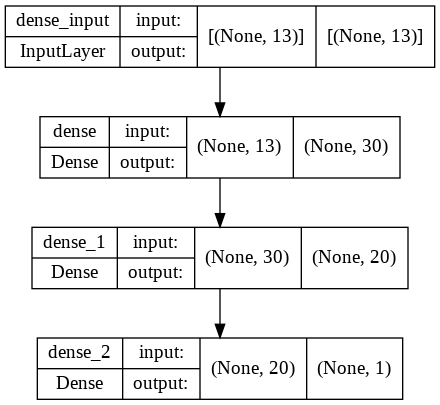

In [35]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [36]:
%matplotlib inline

import keras
from IPython.display import clear_output

In [37]:
# updatable live loss plot with Keras Model Training
# a minimal example (sort of)
# Code Source: https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

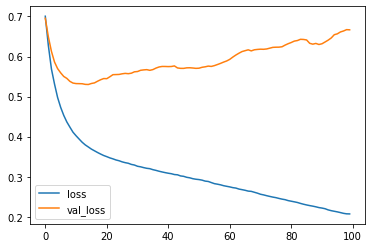

6/6 [==============================] - 0s 55ms/step - loss: 0.2072 - accuracy: 0.9053 - val_loss: 0.6666 - val_accuracy: 0.7442


In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#history = model.fit(df_input_train, df_target_train, epochs=100, verbose=1)

# Note: To print the live training graph, you need to add the callback function as below:
history = model.fit(X_train, y_train, epochs=100, callbacks=[plot_losses], verbose=1, validation_data=(X_val, y_val))

In [ ]:
# Live plotting of model training
# Code Source: https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot_learn_loss_with_acc = PlotLearning()

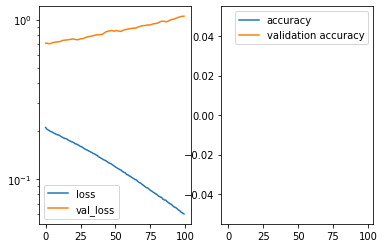

6/6 [==============================] - 0s 88ms/step - loss: 0.0603 - accuracy: 0.9941 - val_loss: 1.0506 - val_accuracy: 0.7442


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#history = model.fit(df_input_train, df_target_train, epochs=100, verbose=1)

# Note: To print the live training graph, you need to add the callback function as below:
history = model.fit(X_train, y_train, epochs=100, callbacks=[plot_learn_loss_with_acc], verbose=1, validation_data=(X_val, y_val))

In [39]:
model.summary()
score = model.evaluate(X_train, y_train, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________
Model Accuracy =  0.8875739574432373


In [40]:
history

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

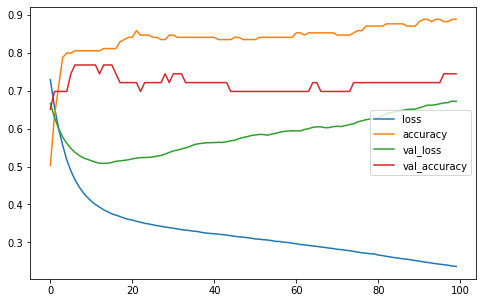

In [42]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

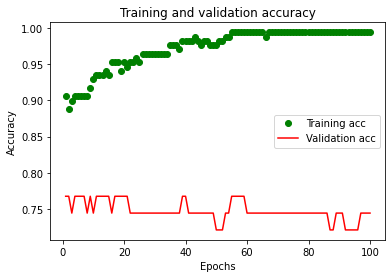

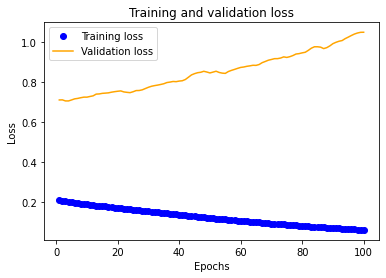

In [ ]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc', color="green")
plt.plot(epochs, val_acc, 'b', label='Validation acc', color="red")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color="orange")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
Target_Classification = model.predict(df_input_test)
Target_Classification = (Target_Classification > 0.5)



from sklearn.metrics import confusion_matrix

print(confusion_matrix(df_target_test, Target_Classification))

[[39  4]
 [ 8 40]]


In [ ]:
import numpy as np
best_model_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
print(best_model_accuracy)

0.9940828680992126


In [51]:
experiment.log_confusion_matrix()

COMET ERROR: Attempt to log empty confusion matrix; ignoring


In [52]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/avkash-prodramp-com/keras-heart-disease/67fb20612b3445a7bd5a42354b45c2b8
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [100]                : (0.5207100510597229, 0.9053254723548889)
COMET INFO:     batch_accuracy [600]          : (0.5, 1.0)
COMET INFO:     batch_loss [600]              : (0.09836835414171219, 0.7490036487579346)
COMET INFO:     epoch_duration [100]          : (0.21660717000008844, 1.0338828700000704)
COMET INFO:     loss [100]                    : (0.20718544721603394, 0.7004960775375366)
COMET INFO:     val_accuracy [100]            : (0.5348837375640869, 0.7674418687820435)
COMET INFO:     val_loss [100]                : (0.5301803946495056, 0.6953901648521423)
COMET INFO:     validate_batch_accuracy [200] 